## To understand how the periodicity in rainfall varies with topographical height/slope.

In [6]:
## environment list
## version of packages
## flowchart of workflow
## metadata
## 


In [7]:
#pip install mpl_toolkits.basemap

## Importing  neccessary packages

In [1]:


from netCDF4 import Dataset
import numpy as np
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from pythia_datasets import DATASETS


## Step 1: Setting up the datasets

In [4]:
file = '/Users/spv2023/MGWR_datasets/inputs/etopo1_MC.nc' # mention the path to the downloaded file
data = Dataset(file, mode='r') # read the data 
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data
bathy = xr.open_dataset(file).B_BATHY



<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['LON16201_20401', 'LON16201_20401_bnds', 'LAT4201_6601', 'LAT4201_6601_bnds', 'TIME', 'B_BATHY'])


/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:240: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [13]:
## sample data format

bathy
bathy.plot(levels=np.arrange(0,3000,100))

AttributeError: module 'numpy' has no attribute 'arrange'

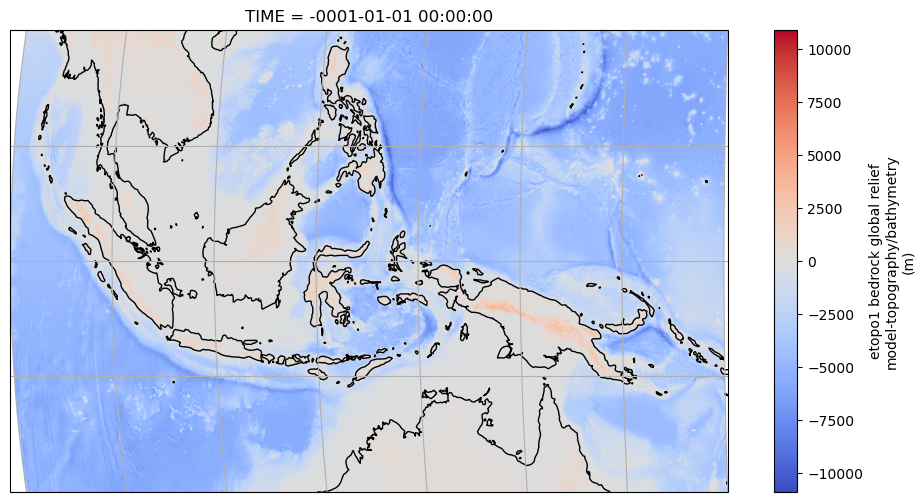

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
bathy.plot(
    ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm'
);

## Step 2: Calculating slope

/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:240: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


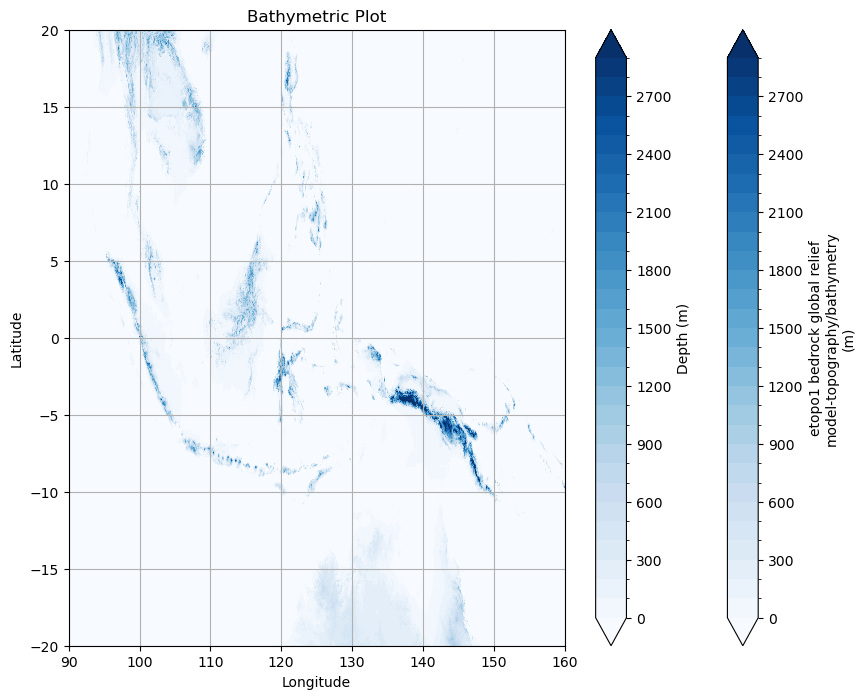

In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Path to your NetCDF file
file = '/Users/spv2023/MGWR_datasets/inputs/etopo1_MC.nc'

# Open the dataset using xarray
ds = xr.open_dataset(file)

# Access the bathymetry data
bathy = ds.B_BATHY

# Define levels for contour plotting
levels = np.arange(0, 3000, 100)  # Adjust range and interval as per your data

# Plotting the bathymetric data
plt.figure(figsize=(10, 8))
contour_plot = bathy.plot(levels=levels, cmap='Blues')  # Store the plot object

# Add colorbar
plt.colorbar(contour_plot, label='Depth (m)')

plt.title('Bathymetric Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Close the dataset when done
ds.close()
